# DecisionTreeClassifier from scratch

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)  
This work by Jephian Lin is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Algorithm
**Input:**  
- `X`: an array of shape `(N,d)` whose rows are samples and columns are features
- `y`: the labels of shape `(N,)`
- `criterion`: `"gini"` or `"entropy"`  

**Output:**  
A tuple `(predict, tree)`.  
- `predict`: a function that takes data `X_sample` and output their predicted labels
- `tree`: a dictionary that contains the information same as those in `model.tree_`

**Steps:**
1. Define $\operatorname{node}({\bf x}) = 0$ for every sample point ${\bf x}$.  
2. Let `queue = [0]` and `node_count = 0` .
3. While `queue` is not empty:  
    1. Pick the first element $k$ from `queue` and remove it.
    2. Let $U$ be the points with $\operatorname{node}({\bf x}) = k$.
    3. Compute $\operatorname{imp}(k)$ as the impurity of labels of $U$.  
If $\operatorname{imp}(k)=0$, then skip this loop.
    4. For each feature $f_j$ and each sample point ${\bf x}_i\in U$, partition $U$ into two parts $L$ and $R$ by the criteria $f_j({\bf x}) \leq f_j({\bf x}_i)$, calculate the impurity $H_L$ and $H_R$ in each part, and obtain the value  
$$I'_{j,i} = \frac{|L|}{|U|}H_L + \frac{|R|}{|U|}H_R,$$
which is a nonpositive value.
    5. Pick a pair $j$ and $i$ that achieves the minimum $I'_{j,i}$.  
Let $\operatorname{node}({\bf x})$ be `node_count+1` if ${\bf x}\in L$.  
Let $\operatorname{node}({\bf x})$ be `node_count+2` if ${\bf x}\in R$.  
Let `queue += [node_count+1, node_count+2]` and `node_count += 2` .

4. Each new point falls into a unique leaf in your decision tree.  Since each leaf contains only one class, use the class as the prediction of this point.

## Pseudocode
Translate the algorithm into the pseudocode.  
This helps you to identify the parts that you don't know how to do it.  

    1. 
    2. 
    3. ...

## Code

In [3]:
### your answer here
class MyDecisionTreeClassifier():
    def __init__(self, criterion="gini"):#建立基本屬性
        self.criterion = criterion
        self.tree_ = self.tree()
        
    class tree():#存取tree
        children_left = []
        children_right = []
        feature = []
        threshold = []
        n_node_samples = []
        impurity = []
        depth = []
        
        def clear(self):
            self.children_left.clear()#清空tree
            self.children_right.clear()
            self.feature.clear()
            self.threshold.clear()
            self.n_node_samples.clear()
            self.impurity.clear()
            self.depth.clear()
        #step1
        
    def fit(self, X, y):
        #1.
        self.tree_.clear()
        node = np.zeros(X.shape[0])
        self.tree_.depth.append(1)
        self.max_depth = 0
        #2.Let queue = [0] and node_count = 0 .
        queue = [0]
        node_count = 0
        #3.分群
        while len(queue) > 0: #While queue is not empty: Queue是代表有幾群
            #A.
            k = queue.pop(0)#移除第一個數
            #B.Let  𝑈  be the points with  node(𝐱)=𝑘 .U儲存值
            U = np.where(node == k)[0]
            #C.     
            if self.imp(y[U]) == 0:#很純的話就不用分群
                self.tree_.children_left.append(-1) #把-1丟進去
                self.tree_.children_right.append(-1)
                self.tree_.feature.append(-1)
                self.tree_.threshold.append(-1)
                self.tree_.n_node_samples.append(len(U))
                self.tree_.impurity.append(0)
                if self.tree_.depth[k] > self.max_depth:
                    self.max_depth = self.tree_.depth[k]
                continue
            #D.尋找最佳的分類點
            minI = np.inf#設無線大
            minj = 0
            mini = 0
            #j特徵直/i:node
            for j in range(X.shape[1]):
                for i in range(len(U)):
                    L = U[X[U, j]<=X[U[i], j]]  #f_j(𝐱)≤f_j(𝐱_i) //x(N,d)
                    R = U[X[U, j]>X[U[i], j]]   #f_j(𝐱)>f_j(𝐱_i)
                    H_L = self.imp(y[L]) #impurity_left
                    H_R = self.imp(y[R])
                    I = len(L)/len(U)*H_L + len(R)/len(U)*H_R
                    if I < minI:
                        minI = I
                        minj = j
                        mini = i
            #E.分類
            self.tree_.children_left.append(node_count + 1)
            self.tree_.children_right.append(node_count + 2)
            self.tree_.feature.append(minj)
            self.tree_.threshold.append(X[U[mini], minj])
            self.tree_.n_node_samples.append(len(U))
            self.tree_.impurity.append(minI)
            
            L = U[X[U, minj]<=X[U[mini], minj]]  #f_j(𝐱)≤f_j(𝐱_i)
            R = U[X[U, minj]>X[U[mini], minj]]   #f_j(𝐱)>f_j(𝐱_i)
            node[L] = node_count + 1
            node[R] = node_count + 2
            queue += [node_count+1, node_count+2]
            self.tree_.depth.append(self.tree_.depth[k]+1)
            self.tree_.depth.append(self.tree_.depth[k]+1)
            node_count += 2
            
        #4.
        node_class = []#list
        mask = np.unique(node) #11223444/1234
        for c in mask:
            node_class.append([c, y[node == c][0]]) #第幾群 有幾個
        self.node_class = np.array(node_class)
            
    def imp(self, y): 
        mask = np.unique(y)
        imp = 0
        if self.criterion == "gini":
            for v in mask:
                p = np.sum(y==v)/len(y)
                imp += p*(1-p)
        else:
            for v in mask:
                p = np.sum(y==v)/len(y)
                imp -= p*np.log(p)
        return imp
    
    def predict(self, X):#預測/跟前面類似
        #1.
        node = np.zeros(X.shape[0])
        #2.
        queue = [0]
        node_count = 0
        #3.
        while len(queue) > 0:
            #A.
            k = queue.pop(0)
            #B.
            U = np.where(node == k)[0]
            #C.
            if k in self.node_class[:, 0]:
                continue
            #D.
            j = self.tree_.feature[k]
            f = self.tree_.threshold[k]
            #E.
            L = U[X[U, j]<=f]
            R = U[X[U, j]>f]
            node[L] = node_count + 1
            node[R] = node_count + 2
            queue += [node_count+1, node_count+2]
            node_count += 2
            
        #4.
        y = node
        mask = np.unique(node)
        for c in mask:
            y[node == c] = self.node_class[self.node_class[:, 0] == c][0, 1]
        return y

In [4]:
node = np.zeros(5)
node[3] = 1
queue = [0]
node_count = 0
while len(queue) > 0:
    k = queue.pop(0)
    U = np.where(node == k)[0]
queue += [2,3]
queue = np.array([[1,2,3],[4,2,3],[5,2,3],[6,2,3]])
np.where(queue[:,0]==5)[0][0]

2

## Test
Take some sample data from [DecisionTreeClassifier-with-scikit-learn](DecisionTreeClassifier-with-scikit-learn.ipynb) and check if your code generates similar outputs with the existing packages.

##### Name of the data
Description of the data.

In [7]:
### results with your code
# X: an array of shape (N,d) whose rows are samples and columns are features
# y: the labels of shape (N,)
mu = np.array([1,1])
cov = np.array([[1.1,-1],
                [-1,1.1]])
X = np.vstack([np.random.multivariate_normal(mu, cov, 100), 
               np.random.multivariate_normal(-mu, cov, 100)])
y = np.array([0]*100 + [1]*100)

X_sample = np.vstack([np.random.multivariate_normal(mu, cov, 100), 
               np.random.multivariate_normal(-mu, cov, 100)])
y_sample = np.array([0]*100 + [1]*100)

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X, y)#訓練
y_new1 = model.predict(X_sample)#預測
#print(y_new)

model = MyDecisionTreeClassifier()
model.fit(X, y)
y_new2 = model.predict(X_sample)
print('length of y')
print(len(y_new1))
print('sklearn accuracy:')
print((np.sum(y_sample == y_new1)/len(y_new1)))#sklearn
print('my accuracy:')
print((np.sum(y_sample == y_new2)/len(y_new1)))#my
print('how many the same:')
print(np.sum(y_new1 == y_new2))



print(model.tree_.n_node_samples)#node分別有多少個數
print(model.tree_.impurity)#純度0就不分群
print(model.tree_.depth)#分別屬於哪一層
print(model.max_depth)


length of y
200
sklearn accuracy:
0.975
my accuracy:
0.975
how many the same:
198
[200, 91, 109, 80, 11, 20, 89]
[0.26000604899687474, 0.0, 0.0, 0, 0, 0, 0]
[1, 2, 2, 3, 3, 3, 3]
3


200

In [6]:
### results with existing packages

## Comparison

##### Exercise 1
Let  
```python
t = np.arange(20)
angle = 2 * np.pi / 20 * t
X1 = np.vstack([np.cos(angle), np.sin(angle)]).T
X2 = 5 * X1
X = np.vstack([X1, X2])
X_sample = 10 * np.random.rand(1000,2) - np.array([5,5])
```

###### 1(a)
Train a decision tree classification model by `X` and `y` .  
Make a prediction of `X_sample` by:  
1. your code with different algorithm settings
2. `sklearn.neighbors.KNeighborsClassifier`

The results should be the same (or almost the same).  
Check if this is true.  
(Note: the uncertainty is caused by the choice of cut when there are several cuts with the same information gain.)

In [12]:
### your answer here
t = np.arange(20)
angle = 2 * np.pi / 20 * t
X1 = np.vstack([np.cos(angle), np.sin(angle)]).T
X2 = 5 * X1
X = np.vstack([X1, X2])
y = np.array([0]*20 + [1]*20)
X_sample = 10 * np.random.rand(1000,2) - np.array([5,5])

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X, y)
y_new1 = model.predict(X_sample)

model = MyDecisionTreeClassifier()
model.fit(X, y)
y_new2 = model.predict(X_sample)


###### 1(b)
Let `y_new` be the prediction of `X_sample` in the previous question. 
Plot the points (rows) in `X` with `c=y` .  
Plot the points (rows) in `X_sample` with `c=y_new` and `alpha=0.1` .

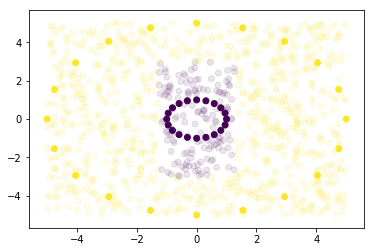

In [15]:
### your answer here
plt.scatter(*X.T, c=y)
plt.scatter(*X_sample.T, c=y_new1, alpha=0.1)#透明度
#切的4個跟下圖點不同

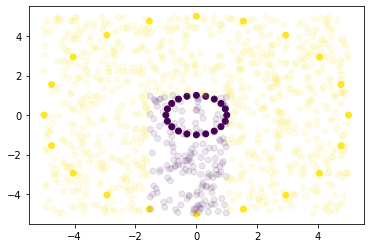

In [12]:
plt.scatter(*X.T, c=y)
plt.scatter(*X_sample.T, c=y_new2, alpha=0.1)

###### 1(c)
Let  
```python
model = DecisionTreeClassifier()
model.fit(X, y)
```  
The corresponding values in `model.tree_` and those in your `tree` should be almost the same.  
Check if this is true.

In [13]:
### your answer here
#左右定義不同definiti
model = DecisionTreeClassifier()
model.fit(X, y)
print(model.tree_.n_node_samples)
model = MyDecisionTreeClassifier()
model.fit(X, y)
print(model.tree_.n_node_samples)

[40  9 31 22  1 21 20  1  9]
[40, 31, 9, 9, 22, 21, 1, 1, 20]


##### Exercise 2
Let  
```python
m,n = 8,8
frames = (m-2) * (n-2)

o = np.array([[1,1,1],
              [1,0,1],
              [1,1,1]])
x = np.array([[1,0,1],
              [0,1,0],
              [1,0,1]])
oo = np.zeros((frames, m, n))
xx = np.zeros((frames, m, n))
count =  0
for i in range(m-2):
    for j in range(n-2):
        oo[count, i:i+3, j:j+3] = o
        xx[count, i:i+3, j:j+3] = x
        count += 1


X = np.vstack([oo, xx]).reshape(2*frames, -1)
y = np.array([0]*frames + [1]*frames)
```

In [14]:
m,n = 8,8
frames = (m-2) * (n-2)

o = np.array([[1,1,1],
              [1,0,1],
              [1,1,1]])
x = np.array([[1,0,1],
              [0,1,0],
              [1,0,1]])
oo = np.zeros((frames, m, n))
xx = np.zeros((frames, m, n))
count =  0
for i in range(m-2):
    for j in range(n-2):
        oo[count, i:i+3, j:j+3] = o
        xx[count, i:i+3, j:j+3] = x
        count += 1


X = np.vstack([oo, xx]).reshape(2*frames, -1)
y = np.array([0]*frames + [1]*frames)

###### 2(a)
Train a decision tree classification model by `X` an `y` .  
Make a prediction `y_new` for the training data `X` .  
What is the outcome?  
Can we say decision tree model is better than the $k$-nearest neighbors model?  (open answer)

In [15]:
### your answer here
model = MyDecisionTreeClassifier()
model.fit(X, y)
y_new = model.predict(X)
print(y_new)
print(y)
#knn:  high accuracy but complicated calculation
#decisiomtree:easy to undestand but information gain toward to  features,overfitting

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


###### 2(b)
Print the `n_node_samples` for each leaf.  
Does the leaves contain many samples?

In [16]:
### your answer here
print(model.tree_.n_node_samples)

[72, 59, 13, 50, 9, 9, 4, 47, 3, 6, 3, 6, 3, 36, 11, 4, 2, 5, 1, 32, 4, 7, 4, 3, 1, 27, 5, 1, 3, 4, 3, 23, 4, 15, 8, 2, 2, 13, 2, 4, 4, 1, 1, 10, 3, 3, 1, 1, 2]


###### 2(c)
What is the depth of the decision tree?  
(The depth of a tree is the number of vertices on the longest path from a root to a leaf.)

In [17]:
### your answer here
print(model.max_depth)

12
